In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stack-overflow-2020/view
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/survey_results_schema.csv
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/survey_results_public.csv
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/README_2020.txt
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/so_survey_2020.pdf
/kaggle/input/stack-overflow-developer-surveys-20152020/2015 Stack Overflow Developer Survey Responses/2015 Stack Overflow Developer Survey Responses.csv
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2017/survey_results_schema.csv
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2017/DeveloperSurvey2017QuestionaireCleaned.pdf
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_survey_2017/survey_results_public.csv
/kaggle/input/stack-overflow-developer-surveys-20152020/developer_s

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

#defining the starting dataframes, because of the light difference in the headers and shape of questionery data in different years, it is better
#to load them first in different datasets


df_2020 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2020(1)/survey_results_public.csv')
df_2019 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2019/survey_results_public.csv')
df_2018 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2018/survey_results_public.csv')
df_2017 = pd.read_csv('../input/stack-overflow-developer-surveys-20152020/developer_survey_2017/survey_results_public.csv')



/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# to performe the analysis and answer the questions, the following cols are chosen: 
# "Language Worked With", "Language Desire Next Year", "Database Worked With", "Database Desire Next Year", "Misc Tech Worked With", "Misc Tech Desire Next Year"
#it is always better to unify the column names. by observing the Schema of the questionery of the different years, it is clear that in years 2017 and 2018 are other column names used.
# hier is a code to unify them:

df_2018.rename(columns={'FrameworkDesireNextYear' : 'MiscTechDesireNextYear', 'FrameworkWorkedWith' : 'MiscTechWorkedWith' }, inplace=True)
df_2017.rename(columns={'WantWorkDatabase' : 'DatabaseDesireNextYear','HaveWorkedDatabase' : 'DatabaseWorkedWith' ,'WantWorkLanguage' : 'LanguageDesireNextYear',
                        'HaveWorkedLanguage' : 'LanguageWorkedWith', 'WantWorkFramework' : 'MiscTechDesireNextYear', 'HaveWorkedFramework' : 'MiscTechWorkedWith' }, inplace=True)


In [4]:
#now picking the needed info from the yearly datasets:

df_2020_select = df_2020[['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear']]
df_2019_select = df_2019[['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear']]
df_2018_select = df_2018[['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear']]
df_2017_select = df_2017[['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear']]

# gathering all to gether in a dataframe keyed by years:

df = pd.concat([df_2020_select, df_2019_select, df_2018_select, df_2017_select], keys=['2020', '2019', '2018', '2017'], ignore_index=True)
df.head()

,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear
0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Elasticsearch;Microsoft SQL Server;Oracle,Microsoft SQL Server,.NET;.NET Core,.NET Core;Xamarin
1,JavaScript;Swift,Python;Swift,NaN,NaN,React Native,React Native;TensorFlow;Unity 3D
2,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,Ansible,Ansible;Chef


In [5]:
# in the questioneries, the different attributes are seperated with ";".
# in order to be able to analyse them we have to split them. the percentual count of each attribute is gathered as follow:

Language_list_2017=df_2017_select['LanguageWorkedWith'].str.split('; ') # in Dataset 2017 the Languages are seperated with '; ' 
cat_set=[]
for i in Language_list_2017.dropna():
    cat_set.extend(i)
Languageworkedwith_2017=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2017")


Language_list_2018=df_2018_select['LanguageWorkedWith'].str.split(';')
cat_set=[]
for i in Language_list_2018.dropna():
    cat_set.extend(i)
Languageworkedwith_2018=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2018")

Language_list_2019=df_2019_select['LanguageWorkedWith'].str.split(';')
cat_set=[]
for i in Language_list_2019.dropna():
    cat_set.extend(i)
Languageworkedwith_2019=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2019")

Language_list_2020=df_2020_select['LanguageWorkedWith'].str.split(';')
cat_set=[]
for i in Language_list_2020.dropna():
    cat_set.extend(i)
Languageworkedwith_2020=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2020")



In [6]:
#summery table of top 5 programing language unsed in each year with it usage precentage:
Languageworkedwith_top10_perc = pd.DataFrame({'2017':Languageworkedwith_2017.index[0:10],'2017 %' : Languageworkedwith_2017.iloc[:10,0].values[:10],
                                              '2018':Languageworkedwith_2018.index[0:10],'2018 %' : Languageworkedwith_2018.iloc[:10,0].values[:10],
                                              '2019':Languageworkedwith_2019.index[0:10],'2019 %' : Languageworkedwith_2019.iloc[:10,0].values[:10],
                                              '2020':Languageworkedwith_2020.index[0:10],'2020 %' : Languageworkedwith_2020.iloc[:10,0].values[:10]},index = ['1','2','3','4','5','6','7','8','9','10'] )
Languageworkedwith_top10_perc

,2017,2017 %,2018,2018 %,2019,2019 %,2020,2020 %
1,JavaScript,16.5,JavaScript,11.3,JavaScript,13.4,JavaScript,13.5
2,SQL,13.5,HTML,11.0,HTML/CSS,12.6,HTML/CSS,12.6
3,Java,10.5,CSS,10.5,SQL,10.8,SQL,10.9
4,C#,9.0,SQL,9.2,Python,8.3,Python,8.8
5,Python,8.4,Java,7.3,Java,8.2,Java,8.0
6,PHP,7.4,Bash/Shell,6.4,Bash/Shell/PowerShell,7.3,Bash/Shell/PowerShell,6.6
7,C++,5.9,Python,6.3,C#,6.2,C#,6.3
8,C,5.0,C#,5.5,PHP,5.2,PHP,5.2
9,TypeScript,2.5,PHP,5.0,C++,4.7,TypeScript,5.1
10,Ruby,2.4,C++,4.1,TypeScript,4.2,C++,4.8


In [7]:
#list of all the languages and their usage percentage for each year
Language_list= (Languageworkedwith_2017 + Languageworkedwith_2018 +Languageworkedwith_2019 + Languageworkedwith_2020)
Languageworkedwith_total=pd.concat([Languageworkedwith_2017,Languageworkedwith_2018,Languageworkedwith_2019,Languageworkedwith_2020], axis=1)


Languageworkedwith_total = pd.concat([Languageworkedwith_total, Languageworkedwith_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)
# by looking at the list of the languages, it is observed that some attributes are gather under slighly different name in differnt years. there they are unified:
Languageworkedwith_total.loc["HTML/CSS"] = Languageworkedwith_total.loc["HTML/CSS"]+ Languageworkedwith_total.loc["HTML"]+ Languageworkedwith_total.loc["CSS"]
Languageworkedwith_total.loc["Bash/Shell/PowerShell"] = Languageworkedwith_total.loc["Bash/Shell/PowerShell"]+ Languageworkedwith_total.loc["Bash/Shell"]

#top 10 languages ordered by the usage per. in entire period
Languageworkedwith_top=Languageworkedwith_total.sort_values(by=[0], ascending=False)
Languageworkedwith_top_10 =Languageworkedwith_top[:10]

In [8]:
Languageworkedwith_top_10

,2017,2018,2019,2020,0
JavaScript,16.5,11.3,13.4,13.5,54.7
HTML/CSS,0.0,21.5,12.6,12.6,46.7
SQL,13.5,9.2,10.8,10.9,44.4
Java,10.5,7.3,8.2,8.0,34.0
Python,8.4,6.3,8.3,8.8,31.8
C#,9.0,5.5,6.2,6.3,27.0
PHP,7.4,5.0,5.2,5.2,22.8
Bash/Shell/PowerShell,0.0,6.4,7.3,6.6,20.3
C++,5.9,4.1,4.7,4.8,19.5
C,5.0,3.7,4.1,4.3,17.1


In [9]:
#the list ist transposed in order to be able to drow the graph
Languageworkedwith_top_10_trans =Languageworkedwith_top_10.T.drop([0,0])


<AxesSubplot:ylabel='usage percentage'>

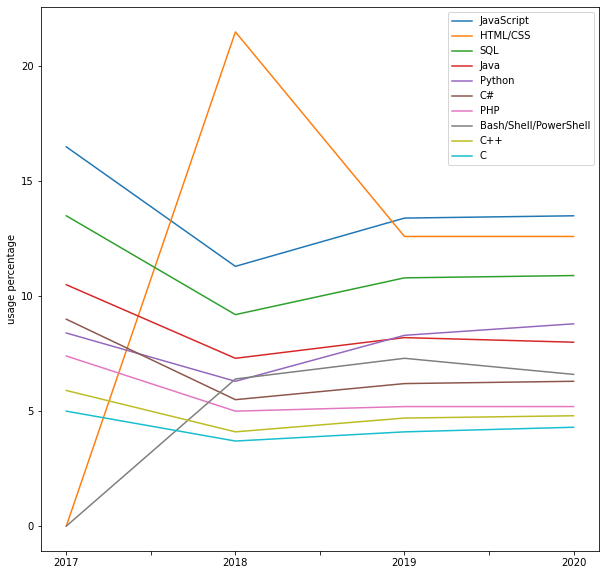

In [10]:
#graph of the usage percentage for each attribute over the years
Languageworkedwith_top_10_trans.plot.line(figsize = (10,10), ylabel = "usage percentage")

In [11]:
# the same prcedure for languages desired for the next years:
Languagenexty_list_2017=df_2017_select['LanguageDesireNextYear'].str.split('; ') # in Dataset 2017 the Languages are seperated with '; ' 
cat_set=[]
for i in Languagenexty_list_2017.dropna():
    cat_set.extend(i)
LanguageDesireNextYear_2017=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2017")


Languagenexty_list_2018=df_2018_select['LanguageDesireNextYear'].str.split(';')
cat_set=[]
for i in Languagenexty_list_2018.dropna():
    cat_set.extend(i)
LanguageDesireNextYear_2018=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2018")

Languagenexty_list_2019=df_2019_select['LanguageDesireNextYear'].str.split(';')
cat_set=[]
for i in Languagenexty_list_2019.dropna():
    cat_set.extend(i)
LanguageDesireNextYear_2019=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2019")

Languagenexty_list_2020=df_2020_select['LanguageDesireNextYear'].str.split(';')
cat_set=[]
for i in Languagenexty_list_2020.dropna():
    cat_set.extend(i)
LanguageDesireNextYear_2020=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2020")



In [12]:
Languagenexty_list= (LanguageDesireNextYear_2017 + LanguageDesireNextYear_2018 +LanguageDesireNextYear_2019 + LanguageDesireNextYear_2020)
LanguageDesireNextYear_total=pd.concat([LanguageDesireNextYear_2017,LanguageDesireNextYear_2018,LanguageDesireNextYear_2019,LanguageDesireNextYear_2020], axis=1)


LanguageDesireNextYear_total = pd.concat([LanguageDesireNextYear_total, LanguageDesireNextYear_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)
LanguageDesireNextYear_total.loc["HTML/CSS"] = LanguageDesireNextYear_total.loc["HTML/CSS"]+ LanguageDesireNextYear_total.loc["HTML"]+ LanguageDesireNextYear_total.loc["CSS"]
LanguageDesireNextYear_total.loc["Bash/Shell/PowerShell"] = LanguageDesireNextYear_total.loc["Bash/Shell/PowerShell"]+ LanguageDesireNextYear_total.loc["Bash/Shell"]

LanguageDesireNextYear_top=LanguageDesireNextYear_total.sort_values(by=[0], ascending=False)
LanguageDesireNextYear_top_10 =LanguageDesireNextYear_top[:10]
LanguageDesireNextYear_top_10

,2017,2018,2019,2020,0
JavaScript,12.8,10.0,11.2,11.0,45.0
Python,9.9,8.5,10.1,11.2,39.7
HTML/CSS,0.0,16.0,9.2,8.7,33.9
SQL,8.8,7.3,8.4,8.4,32.9
Java,7.8,5.8,5.9,5.6,25.1
C#,8.0,5.3,5.6,5.7,24.6
TypeScript,4.5,4.4,6.0,7.2,22.1
C++,6.0,4.0,4.2,4.1,18.3
Go,4.5,4.0,4.3,5.3,18.1
Bash/Shell/PowerShell,0.0,5.4,5.4,4.9,15.7


<AxesSubplot:ylabel='desired to work with (percentage)'>

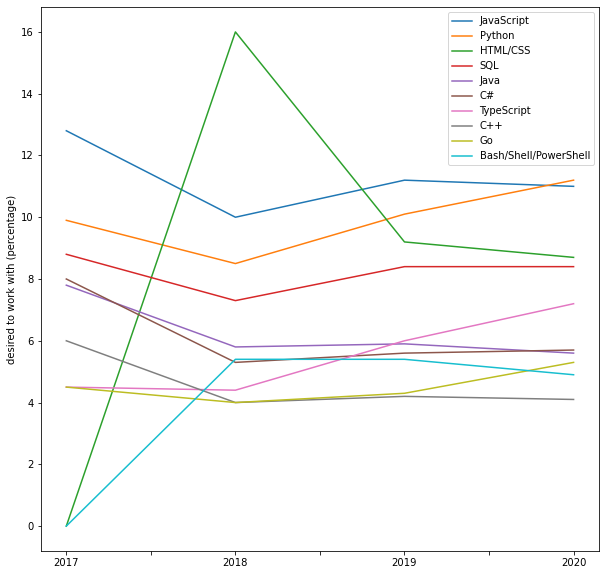

In [13]:
LanguageDesireNextYear_top_10_trans =LanguageDesireNextYear_top_10.T.drop([0,0])
LanguageDesireNextYear_top_10_trans.plot.line(figsize = (10,10), ylabel = "desired to work with (percentage)")

In [14]:
# the same prcedure for databases years:

Database_list_2017=df_2017_select['DatabaseWorkedWith'].str.split('; ') # in Dataset 2017 the Databases are seperated with '; ' 
cat_set=[]
for i in Database_list_2017.dropna():
    cat_set.extend(i)
DatabaseWorkedWith_2017=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2017")


Database_list_2018=df_2018_select['DatabaseWorkedWith'].str.split(';')
cat_set=[]
for i in Database_list_2018.dropna():
    cat_set.extend(i)
DatabaseWorkedWith_2018=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2018")

Database_list_2019=df_2019_select['DatabaseWorkedWith'].str.split(';')
cat_set=[]
for i in Database_list_2019.dropna():
    cat_set.extend(i)
DatabaseWorkedWith_2019=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2019")

Database_list_2020=df_2020_select['DatabaseWorkedWith'].str.split(';')
cat_set=[]
for i in Database_list_2020.dropna():
    cat_set.extend(i)
DatabaseWorkedWith_2020=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2020")


In [15]:
DatabaseWorkedWith_top10_perc = pd.DataFrame({'2017':DatabaseWorkedWith_2017.index[0:5],'2017 %' : DatabaseWorkedWith_2017.iloc[:5,0].values[:5],
                                              '2018':DatabaseWorkedWith_2018.index[0:5],'2018 %' : DatabaseWorkedWith_2018.iloc[:5,0].values[:5],
                                              '2019':DatabaseWorkedWith_2019.index[0:5],'2019 %' : DatabaseWorkedWith_2019.iloc[:5,0].values[:5],
                                              '2020':DatabaseWorkedWith_2020.index[0:5],'2020 %' : DatabaseWorkedWith_2020.iloc[:5,0].values[:5]},index = ['1','2','3','4','5'] )
DatabaseWorkedWith_top10_perc

,2017,2017 %,2018,2018 %,2019,2019 %,2020,2020 %
1,MySQL,27.5,MySQL,20.9,MySQL,19.6,MySQL,20.1
2,SQL Server,19.1,SQL Server,14.7,PostgreSQL,12.5,PostgreSQL,13.0
3,SQLite,13.2,PostgreSQL,11.7,Microsoft SQL Server,11.9,Microsoft SQL Server,11.9
4,PostgreSQL,13.1,MongoDB,9.2,SQLite,11.5,SQLite,11.2
5,MongoDB,10.4,SQLite,7.0,MongoDB,9.2,MongoDB,9.5


In [16]:
Database_list= (DatabaseWorkedWith_2017 + DatabaseWorkedWith_2018 +DatabaseWorkedWith_2019 + DatabaseWorkedWith_2020)
DatabaseWorkedWith_total=pd.concat([DatabaseWorkedWith_2017,DatabaseWorkedWith_2018,DatabaseWorkedWith_2019,DatabaseWorkedWith_2020], axis=1)


DatabaseWorkedWith_total = pd.concat([DatabaseWorkedWith_total, DatabaseWorkedWith_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)
DatabaseWorkedWith_total.loc["SQL Server"] = DatabaseWorkedWith_total.loc["SQL Server"]+ DatabaseWorkedWith_total.loc["Microsoft SQL Server"]
DatabaseWorkedWith_total = DatabaseWorkedWith_total.drop(["Microsoft SQL Server"])

DatabaseWorkedWith_top=DatabaseWorkedWith_total.sort_values(by=[0], ascending=False)
DatabaseWorkedWith_top_10 =DatabaseWorkedWith_top[:10]
DatabaseWorkedWith_top_10

,2017,2018,2019,2020,0
MySQL,27.5,20.9,19.6,20.1,88.1
SQL Server,19.1,14.7,11.9,11.9,57.6
PostgreSQL,13.1,11.7,12.5,13.0,50.3
SQLite,13.2,7.0,11.5,11.2,42.9
MongoDB,10.4,9.2,9.2,9.5,38.3
Redis,7.0,6.4,6.8,6.6,26.8
Oracle,8.2,4.0,6.0,5.9,24.1
MariaDB,0.0,4.8,6.0,6.1,16.9
Elasticsearch,0.0,5.0,5.2,5.0,15.2
Firebase,0.0,0.0,4.7,5.2,9.9


,2017,2018,2019,2020,0
MySQL,27.5,20.9,19.6,20.1,88.1
SQL Server,19.1,14.7,11.9,11.9,57.6
PostgreSQL,13.1,11.7,12.5,13.0,50.3
SQLite,13.2,7.0,11.5,11.2,42.9
MongoDB,10.4,9.2,9.2,9.5,38.3
Redis,7.0,6.4,6.8,6.6,26.8
Oracle,8.2,4.0,6.0,5.9,24.1
MariaDB,0.0,4.8,6.0,6.1,16.9
Elasticsearch,0.0,5.0,5.2,5.0,15.2
Firebase,0.0,0.0,4.7,5.2,9.9


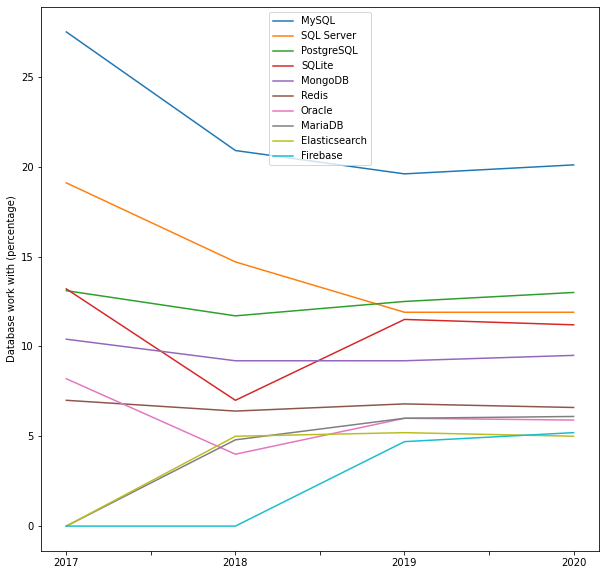

In [17]:
DatabaseWorkedWith_top_10_trans =DatabaseWorkedWith_top_10.T.drop([0,0])
DatabaseWorkedWith_top_10_trans.plot.line(figsize = (10,10), ylabel = "Database work with (percentage)")

Database_list= (DatabaseWorkedWith_2017 + DatabaseWorkedWith_2018 +DatabaseWorkedWith_2019 + DatabaseWorkedWith_2020)
DatabaseWorkedWith_total=pd.concat([DatabaseWorkedWith_2017,DatabaseWorkedWith_2018,DatabaseWorkedWith_2019,DatabaseWorkedWith_2020], axis=1)


DatabaseWorkedWith_total = pd.concat([DatabaseWorkedWith_total, DatabaseWorkedWith_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)
DatabaseWorkedWith_total.loc["SQL Server"] = DatabaseWorkedWith_total.loc["SQL Server"]+ DatabaseWorkedWith_total.loc["Microsoft SQL Server"]
DatabaseWorkedWith_total = DatabaseWorkedWith_total.drop(["Microsoft SQL Server"])

DatabaseWorkedWith_top=DatabaseWorkedWith_total.sort_values(by=[0], ascending=False)
DatabaseWorkedWith_top_10 =DatabaseWorkedWith_top[:10]
DatabaseWorkedWith_top_10

In [18]:
#DatabaseDesireNextYear

Databasenexty_list_2017=df_2017_select['DatabaseDesireNextYear'].str.split('; ') # in Dataset 2017 the Databases are seperated with '; ' 
cat_set=[]
for i in Databasenexty_list_2017.dropna():
    cat_set.extend(i)
DatabaseDesireNextYear_2017=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2017")


Databasenexty_list_2018=df_2018_select['DatabaseDesireNextYear'].str.split(';')
cat_set=[]
for i in Databasenexty_list_2018.dropna():
    cat_set.extend(i)
DatabaseDesireNextYear_2018=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2018")

Databasenexty_list_2019=df_2019_select['DatabaseDesireNextYear'].str.split(';')
cat_set=[]
for i in Databasenexty_list_2019.dropna():
    cat_set.extend(i)
DatabaseDesireNextYear_2019=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2019")

Databasenexty_list_2020=df_2020_select['DatabaseDesireNextYear'].str.split(';')
cat_set=[]
for i in Databasenexty_list_2020.dropna():
    cat_set.extend(i)
DatabaseDesireNextYear_2020=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2020")



Databasenexty_list= (DatabaseDesireNextYear_2017 + DatabaseDesireNextYear_2018 +DatabaseDesireNextYear_2019 + DatabaseDesireNextYear_2020)
DatabaseDesireNextYear_total=pd.concat([DatabaseDesireNextYear_2017,DatabaseDesireNextYear_2018,DatabaseDesireNextYear_2019,DatabaseDesireNextYear_2020], axis=1)


DatabaseDesireNextYear_total = pd.concat([DatabaseDesireNextYear_total, DatabaseDesireNextYear_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)
DatabaseDesireNextYear_total.loc["SQL Server"] = DatabaseDesireNextYear_total.loc["SQL Server"]+ DatabaseDesireNextYear_total.loc["Microsoft SQL Server"]
DatabaseDesireNextYear_total = DatabaseDesireNextYear_total.drop(["Microsoft SQL Server"])

DatabaseDesireNextYear_top=DatabaseDesireNextYear_total.sort_values(by=[0], ascending=False)
DatabaseDesireNextYear_top_10 =DatabaseDesireNextYear_top[:10]
DatabaseDesireNextYear_top_10


,2017,2018,2019,2020,0
MySQL,18.5,12.1,13.4,12.7,56.7
MongoDB,18.4,11.6,12.4,13.0,55.4
PostgreSQL,15.2,11.1,13.8,14.3,54.4
SQL Server,13.8,9.0,8.5,8.0,39.3
Redis,11.6,7.8,9.3,9.7,38.4
SQLite,10.9,4.7,9.3,8.8,33.7
Elasticsearch,0.0,7.8,8.1,8.3,24.2
Oracle,5.7,2.4,3.8,3.9,15.8
Cassandra,5.9,3.2,3.2,3.4,15.7
MariaDB,0.0,3.9,5.2,5.0,14.1


<AxesSubplot:ylabel='Database desired to work with (percentage)'>

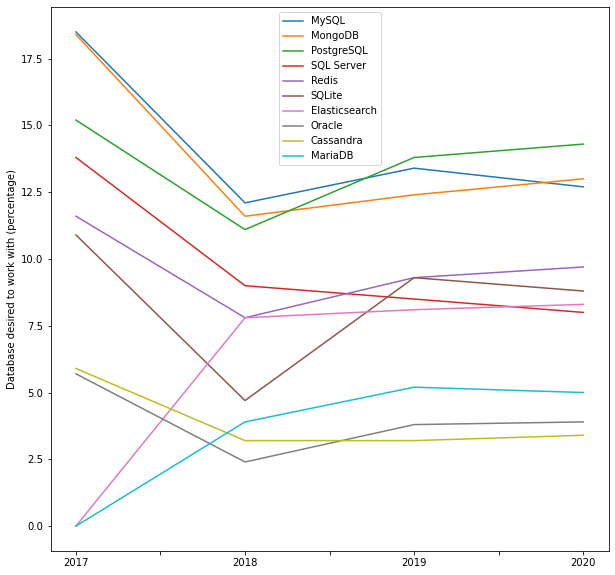

In [19]:
DatabaseDesireNextYear_top_10_trans =DatabaseDesireNextYear_top_10.T.drop([0,0])
DatabaseDesireNextYear_top_10_trans.plot.line(figsize = (10,10), ylabel = "Database desired to work with (percentage)")

In [20]:
#frameworks

MiscTech_list_2017=df_2017_select['MiscTechWorkedWith'].str.split('; ') # in MiscTech 2017 the Databases are seperated with '; ' 
cat_set=[]
for i in MiscTech_list_2017.dropna():
    cat_set.extend(i)
MiscTechWorkedWith_2017=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2017")


MiscTech_list_2018=df_2018_select['MiscTechWorkedWith'].str.split(';')
cat_set=[]
for i in MiscTech_list_2018.dropna():
    cat_set.extend(i)
MiscTechWorkedWith_2018=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2018")

MiscTech_list_2019=df_2019_select['MiscTechWorkedWith'].str.split(';')
cat_set=[]
for i in MiscTech_list_2019.dropna():
    cat_set.extend(i)
MiscTechWorkedWith_2019=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2019")

MiscTech_list_2020=df_2020_select['MiscTechWorkedWith'].str.split(';')
cat_set=[]
for i in MiscTech_list_2020.dropna():
    cat_set.extend(i)
MiscTechWorkedWith_2020=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2020")


MiscTechWorkedWith_top10_perc = pd.DataFrame({'2017':MiscTechWorkedWith_2017.index[0:5],'2017 %' : MiscTechWorkedWith_2017.iloc[:5,0].values[:5],
                                              '2018':MiscTechWorkedWith_2018.index[0:5],'2018 %' : MiscTechWorkedWith_2018.iloc[:5,0].values[:5],
                                              '2019':MiscTechWorkedWith_2019.index[0:5],'2019 %' : MiscTechWorkedWith_2019.iloc[:5,0].values[:5],
                                              '2020':MiscTechWorkedWith_2020.index[0:5],'2020 %' : MiscTechWorkedWith_2020.iloc[:5,0].values[:5]},index = ['1','2','3','4','5'] )
MiscTechWorkedWith_top10_perc

,2017,2017 %,2018,2018 %,2019,2019 %,2020,2020 %
1,Node.js,25.6,Node.js,24.0,Node.js,23.7,Node.js,23.0
2,AngularJS,24.1,Angular,17.8,.NET,17.8,.NET,15.7
3,.NET Core,18.2,React,13.4,.NET Core,11.3,.NET Core,12.0
4,React,10.6,.NET Core,13.1,Pandas,6.1,Pandas,6.9
5,Cordova,6.0,Spring,8.5,Unity 3D,5.4,TensorFlow,5.2


<AxesSubplot:ylabel='Frameworks worked with (percentage)'>

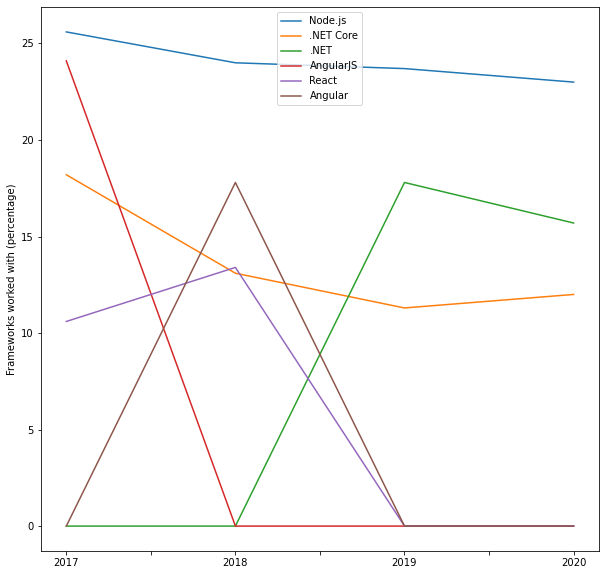

In [21]:

MiscTech_list= (MiscTechWorkedWith_2017 + MiscTechWorkedWith_2018 +MiscTechWorkedWith_2019 + MiscTechWorkedWith_2020)
MiscTechWorkedWith_total=pd.concat([MiscTechWorkedWith_2017,MiscTechWorkedWith_2018,MiscTechWorkedWith_2019,MiscTechWorkedWith_2020], axis=1)


MiscTechWorkedWith_total = pd.concat([MiscTechWorkedWith_total, MiscTechWorkedWith_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)


MiscTechWorkedWith_top=MiscTechWorkedWith_total.sort_values(by=[0], ascending=False)
MiscTechWorkedWith_top_10 =MiscTechWorkedWith_top[:6]
MiscTechWorkedWith_top_10

MiscTechWorkedWith_top_10_trans =MiscTechWorkedWith_top_10.T.drop([0,0])
MiscTechWorkedWith_top_10_trans.plot.line(figsize = (10,10), ylabel="Frameworks worked with (percentage)")

<AxesSubplot:ylabel='Frameworks wished (percentage)'>

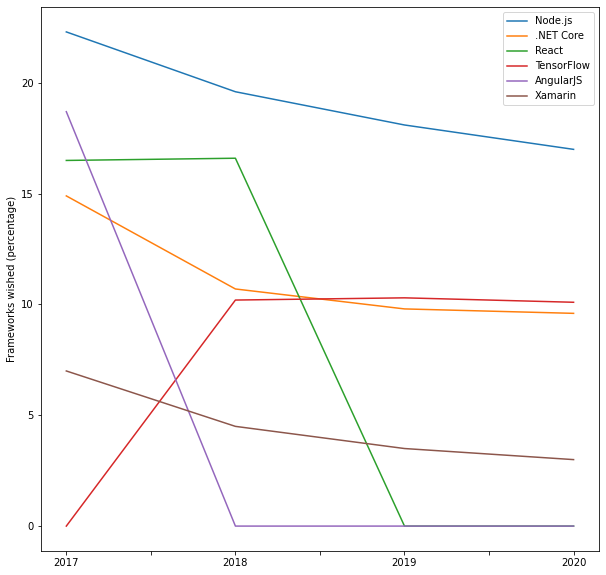

In [22]:
#frameworks wished MiscTechDesireNextYear
MiscTechdesired_list_2017=df_2017_select['MiscTechDesireNextYear'].str.split('; ') # in MiscTech 2017 the Databases are seperated with '; ' 
cat_set=[]
for i in MiscTechdesired_list_2017.dropna():
    cat_set.extend(i)
MiscTechDesireNextYear_2017=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2017")


MiscTechdesired_list_2018=df_2018_select['MiscTechDesireNextYear'].str.split(';')
cat_set=[]
for i in MiscTechdesired_list_2018.dropna():
    cat_set.extend(i)
MiscTechDesireNextYear_2018=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2018")

MiscTechdesired_list_2019=df_2019_select['MiscTechDesireNextYear'].str.split(';')
cat_set=[]
for i in MiscTechdesired_list_2019.dropna():
    cat_set.extend(i)
MiscTechDesireNextYear_2019=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2019")

MiscTechdesired_list_2020=df_2020_select['MiscTechDesireNextYear'].str.split(';')
cat_set=[]
for i in MiscTechdesired_list_2020.dropna():
    cat_set.extend(i)
MiscTechDesireNextYear_2020=pd.Series(cat_set).value_counts(normalize=True).mul(100).round(1).sort_values(ascending=False).to_frame(name = "2020")


MiscTechDesireNextYear_top10_perc = pd.DataFrame({'2017':MiscTechDesireNextYear_2017.index[0:5],'2017 %' : MiscTechDesireNextYear_2017.iloc[:5,0].values[:5],
                                              '2018':MiscTechDesireNextYear_2018.index[0:5],'2018 %' : MiscTechDesireNextYear_2018.iloc[:5,0].values[:5],
                                              '2019':MiscTechDesireNextYear_2019.index[0:5],'2019 %' : MiscTechDesireNextYear_2019.iloc[:5,0].values[:5],
                                              '2020':MiscTechDesireNextYear_2020.index[0:5],'2020 %' : MiscTechDesireNextYear_2020.iloc[:5,0].values[:5]},index = ['1','2','3','4','5'] )
MiscTechDesireNextYear_top10_perc

MiscTechdesired_list= (MiscTechDesireNextYear_2017 + MiscTechDesireNextYear_2018 +MiscTechDesireNextYear_2019 + MiscTechDesireNextYear_2020)
MiscTechDesireNextYear_total=pd.concat([MiscTechDesireNextYear_2017,MiscTechDesireNextYear_2018,MiscTechDesireNextYear_2019,MiscTechDesireNextYear_2020], axis=1)


MiscTechDesireNextYear_total = pd.concat([MiscTechDesireNextYear_total, MiscTechDesireNextYear_total.sum(numeric_only=True, axis=1)], axis=1).fillna(0)


MiscTechDesireNextYear_top=MiscTechDesireNextYear_total.sort_values(by=[0], ascending=False)
MiscTechDesireNextYear_top_10 =MiscTechDesireNextYear_top[:6]
MiscTechDesireNextYear_top_10

MiscTechDesireNextYear_top_10_trans =MiscTechDesireNextYear_top_10.T.drop([0,0])
MiscTechDesireNextYear_top_10_trans.plot.line(figsize = (10,10), ylabel="Frameworks wished (percentage)")
